# Задача 1. Минимизация гладкой функции

## Шаги 1-4:
1.Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]

2.В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.

3.Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.

4.Изучите примеры использования scipy.optimize.minimize в документации Scipy (см. "Материалы")

In [0]:
import math

In [0]:
def f(x):
  return math.sin(x / 5.0) * math.exp(x / 10.0) + 5 * math.exp(-x / 2.0)

## Шаг5:
Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат. 



In [0]:
from scipy.optimize import minimize

In [155]:
minimize(f, 1000)

      fun: -2.350574535755877e+43
 hess_inv: array([[8.53336637e-43]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([999.77390547])

## Шаги 6-8:
6.Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.

7.Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.

8.Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

In [156]:
x_min = minimize(f, 2, method='BFGS')
x_format = int(x_min.x * 100) / 100.0
y_format_1 = int(x_min.fun * 100) / 100.0
print x_min
print x_format
print y_format_1

      fun: 1.7452682903449388
 hess_inv: array([[5.98752437]])
      jac: array([-2.07126141e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627618])
4.13
1.74


In [157]:
x_min = minimize(f, 30, method='BFGS')
x_format = int(x_min.x * 100) / 100.0
y_format_2 = int(x_min.fun * 100) / 100.0
print x_min
print x_format
print y_format_2

      fun: -11.898894665981285
 hess_inv: array([[1.67932484]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019339])
25.88
-11.89


In [0]:
%matplotlib inline
from matplotlib import pylab as plt

In [0]:
import numpy as np

In [0]:
x = np.arange(0, 40, 0.1)
y = map(f, x)

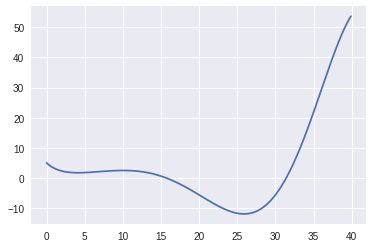

In [161]:
plt.plot(x, y)
plt.show()

In [0]:
with open('minimize_smooth_function_result.txt', 'w') as file_res:
    file_res.write(str(y_format_1) + ' ' + str(y_format_2))

In [163]:
!more minimize_smooth_function_result.txt

1.74 -11.89


In [0]:
from google.colab import files
files.download('minimize_smooth_function_result.txt')

# Задача 2. Глобальная оптимизация

## Шаги 1-6:
1.Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.

2.Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.

3.Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.

4.Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.

5.Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.

6.Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [0]:
from scipy.optimize import differential_evolution

In [166]:
bounds = [(1, 30)]
x_min = differential_evolution(f, bounds)
x_format = int(x_min.x * 100) / 100.0
y_format = int(x_min.fun * 100) / 100.0
print x_min
print x_format
print y_format

     fun: -11.898894665981317
     jac: array([-1.77635684e-07])
 message: 'Optimization terminated successfully.'
    nfev: 98
     nit: 5
 success: True
       x: array([25.8801929])
25.88
-11.89


In [0]:
with open('minimize_smooth_function_evo_result.txt', 'w') as file_res:
    file_res.write(str(y_format))

In [168]:
!more minimize_smooth_function_evo_result.txt

-11.89


In [0]:
from google.colab import files
files.download('minimize_smooth_function_evo_result.txt')

# Задача 3. Минимизация негладкой функции

## Шаги 1, 2:
1.Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.

2.Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.**bold text**

In [0]:
def h(x):
  return int(f(x))

In [0]:
x = np.arange(1, 30, 0.1)
y = map(h, x)

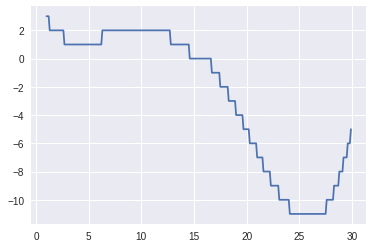

In [172]:
plt.plot(x, y)
plt.show()

## Шаг 3:
Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.


In [174]:
x_min = minimize(h, 30, method='BFGS')
x_format = int(x_min.x * 100) / 100.0
y_bfgs_format = x_min.fun
print x_min
print x_format
print y_bfgs_format

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])
30.0
-5


## Шаги 4-6:
4.Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.

5.Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

6.Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.

In [175]:
bounds = [(1, 30)]
x_min = differential_evolution(h, bounds)
x_format = int(x_min.x * 100) / 100.0
y_evo_format = x_min.fun
print x_min
print x_format
print y_evo_format

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 5
 success: True
       x: array([25.17405484])
25.17
-11.0


In [0]:
with open('minimize_non-smooth_function_result.txt', 'w') as file_res:
    file_res.write(str(y_bfgs_format) + ' ' + str(y_evo_format))

In [177]:
!more minimize_non-smooth_function_result.txt

-5 -11.0


In [0]:
from google.colab import files
files.download('minimize_non-smooth_function_result.txt')